# <img style="float: left; padding-right: 10px; width: 45px" src="styles/iacs.png"> S-109A Introduction to Data Science 

## Homework 1

**Harvard University**<br/>
**Summer 2019**<br/>
**Instructors**: Pavlos Protopapas and Kevin Rader

---


## Main Theme: Data Collection - Web Scraping - Data Parsing 
#### Learning Objectives 

In this homework, your goal is to learn how to acquire, parse, clean, and analyze data. Initially you read the data from a file, then you scrape them directly from a website. You look for specific pieces of information by parsing the data, you clean the data to prepare them for analysis, and finally, you answer some questions.

#### Instructions
- To submit your assignment follow the instructions given in Classroom.
- The deliverables in Classroom are: a) This python notebook with your code and answers, b) a .pdf version of this notebook, c) The BibTex file you created.
d) The JSON file you created.
- Exercise **responsible scraping**. Web servers can become slow or unresponsive if they receive too many requests from the same source in a short amount of time. Use a delay of 10 seconds between requests in your code. This helps not to get blocked by the target website. Run the webpage fetching part of the homework only once and do not re-run after you have saved the results in the JSON file (details below). 
- Web scraping requests can take several minutes. This is another reason why you should not wait until the last minute to do this homework.

## Name: Lucas Machado Moschen

In [2]:
# import the necessary libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)


## Part A [50 pts]:  Help a professor convert his publications to bibTex

### Overview

In Part 1 your goal is to parse the HTML page of a Professor containing some of his publications, and answer some questions. This page is provided to you in the file `data/publist_super_clean.html`. There are 44 publications in descending order from No. 244 to No. 200.

You are to use python's **regular expressions**, a powerful way of parsing text. You may **not** use any parsing tool such as Beautiful Soup yet. In doing so you will get more familiar with three of the common file formats for storing and transferring data, which are:
- CSV, a text-based file format used for storing tabular data that are separated by some delimiter, usually comma or space.
- HTML/XML, the stuff the web is made of.
- JavaScript Object Notation(JSON), a text-based open standard designed for transmitting structured data over the web.

### <p class='q1'> Question 1: Parsing using Regular Expressions 
 **1.1** Write a function called `get_pubs` that takes a .html filename as an input and returns a string containing the HTML page in this file (see definition below). Call this function using `data/publist_super_clean.html` as input and name the returned string `prof_pubs`. 
 
 **1.2** Calculate how many times the author named '`C.M. Friend`' appears in the list of publications. 
 
 **1.3** Find all unique journals and copy them in a variable named `journals`.  
 
 **1.4** Create a list named `pub_authors` whose elements are strings containing the authors' names for each paper. 
    
### Hints
- Look for patterns in the HTML tags that reveal where each piece of information such as the title of the paper, the names of the authors, the journal name, is stored. For example, you might notice that the journal name(s) is contained between the &lt;I&gt; HTML tag.
- Each publication has multiple authors. 
- `C.M. Friend` also shows up as `Cynthia M. Friend` in the file.  Count just `C. M. Friend`. 
- There is a comma at the end of the string of authors. You can choose to keep it in the string or remove it and put it back when you write the string as a BibTex entry. 
- You want to remove duplicates from the list of journals. 

### Resources
- **Regular expressions:** a) https://docs.python.org/3.3/library/re.html, b) https://regexone.com, and c) https://docs.python.org/3/howto/regex.html. 
- ** HTML:** if you are not familiar with HTML see https://www.w3schools.com/html/ or one of the many tutorials on the internet. 
- ** Document Object Model (DOM):** for more on this programming interface for HTML and XML documents see https://www.w3schools.com/js/js_htmldom.asp. 

#### 1.1

In [2]:
# import the regular expressions library
import re

In [3]:
# use this file 
pub_filename = 'data/publist_super_clean.html'

In [4]:
# definition of get_pubs
def get_pubs(filename: str) -> str:
    '''Open the file using the filename. 
       
       Args:
           filename: A string name of the file.
       
       Returns:
           A string containing the HTML page ready to be parsed.
    '''
    with open(filename, 'r') as f:
        line = f.readline()
        html = ""
        while line != "":
            html += line
            line = f.readline()
    return html

In [5]:
page = get_pubs(pub_filename)
limit_print = 800
print(page[0:limit_print])

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">

<TITLE>Kaxiras E journal publications</TITLE>
<HEAD>
<meta http-equiv="Content-Type" content="text/html;charset=UTF-8">
<LINK REL="stylesheet" TYPE="text/css" HREF="../styles/style_pubs.css">
<META NAME="description" CONTENT="">
<META NAME="keywords" CONTENT="Kaxiras E, Multiscale Methods, Computational Materials" >
</HEAD>

<BODY>

<OL START=244>
<LI>
<A HREF="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
&quot;Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons&quot;</A>
<BR>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<I>PHYSICAL REVIEW B </I> <b>84</b>,  125411 (2011)
<BR>
</LI>
</OL


#### 1.2

In [6]:
# I am looking for this unique variation, as the exercise says. 
cmfriend_counts = re.findall(r'C.M. Friend', page)
print("The author C.M. Friend appeared {} times.".format(len(cmfriend_counts)))

The author C.M. Friend appeared 5 times.


#### 1.3

I did not find Biophysical journal in the original file. 

In [7]:
journals = re.findall(r'<I>(.*) </I>', page)
journals = np.unique(journals)

In [8]:
for j in journals:
    print(j)

2010 ACM/IEEE International Conference for High Performance
ACSNano.
Acta Mater.
Catal. Sci. Technol.
Chem. Eur. J.
Comp. Phys. Comm.
Concurrency Computat.: Pract. Exper.
Energy & Environmental Sci.
Int. J. Cardiovasc. Imaging
J. Chem. Phys.
J. Chem. Theory Comput.
J. Phys. Chem. B
J. Phys. Chem. C
J. Phys. Chem. Lett.
J. Stat. Mech: Th. and Exper.
Langmuir
Molec. Phys.
Nano Lett.
NanoLett.
New J. Phys.
New Journal of Physics
PHYSICAL REVIEW B
Phil. Trans. R. Soc. A
Phys. Rev. B
Phys. Rev. E - Rap. Comm.
Phys. Rev. Lett.
Sci. Model. Simul.
Sol. St. Comm.
Top. Catal.


1.4 Create a list named pub_authors whose elements are strings containing the authors' names for each paper.

In [9]:
pub_authors = re.findall(r'<BR> *(.*)\n<I>', page)
# observe the number of authors is equal the number of publications. 
print(len(pub_authors))

45


In [10]:
# check your code: print the list of strings containing the author(s)' names
for item in pub_authors:
    print (item)


Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras,
Martin Heiss, Sonia Conesa-Boj, Jun Ren, Hsiang-Han Tseng, Adam Gali,
Simone Melchionna, Efthimios Kaxiras, Massimo Bernaschi and Sauro Succi, 
J R Maze, A Gali, E Togan, Y Chu, A Trifonov,
Kejie Zhao, Wei L. Wang, John Gregoire, Matt Pharr, Zhigang Suo,
Masataka Katono, Takeru Bessho, Sheng Meng, Robin Humphry-Baker, Guido Rothenberger,
Thomas D. Kuhne, Tod A. Pascal, Efthimios Kaxiras, and Yousung Jung,
Sheng Meng, Efthimios Kaxiras, Md. K. Nazeeruddin, and Michael Gratzel,
Bingjun Xu, Jan Haubrich, Thomas A. Baker, Efthimios Kaxiras, and Cynthia M. Friend,
Jun Ren, Sheng Meng, Yi-Lin Wang, Xu-Cun Ma, Qi-Kun Xue, Efthimios Kaxiras,
Jan Haubrich, Efthimios Kaxiras, and Cynthia M. Friend,
Thomas A. Baker, Bingjun Xu, Stephen C. Jensen, Cynthia M. Friend and Efthimi

Your output should look like this (a line for each paper's author(s) string, with or without the comma)<BR><br>
S. Meng and E. Kaxiras,<br>
G. Lu and E. Kaxiras,<br>
E. Kaxiras and S. Yip,<br>
...<BR>
Simone Melchionna, Efthimios Kaxiras, Massimo Bernaschi and Sauro Succi,<BR>
J R Maze, A Gali, E Togan, Y Chu, A Trifonov,<BR>
E Kaxiras, and M D Lukin,<BR>

<hr style="height:1px">

### Question 2: Parsing and Converting to bibTex using Beautiful Soup

A lot of the bibliographic and publication information is displayed in various websites in a not-so-structured HTML files. Some publishers prefer to store and transmit this information in a .bibTex file which has the following format:
```
@article { _number_
     author = John Doyle
     title = Interaction between atoms
     URL = Papers/PhysRevB_81_085406_2010.pdf
     journal = Phys. Rev. B
     volume = 81
}
```

```
@article
{    author = Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng
     title = "Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"
     URL = Papers/2011/PhysRevB_84_125411_2011.pdf
     journal = PHYSICAL REVIEW B
     volume = 84
}
```
About the [bibTex format](http://www.bibtex.org).

In Question 2 you are given an .html file containing a list of papers scraped from the author's website and you are to write the information into .bibTex format. We used regular expressions for parsing HTML in the previous question but just regular expressions are hard to use in parsing real-life websites. A useful tool is [BeautifulSoup]  (http://www.crummy.com/software/BeautifulSoup/) (BS). You will parse the same file, this time using BS, which makes parsing HTML a lot easier.

**2.1** Write a function called `make_soup` that accepts a filename for an HTML file and returns a BS object.
    
**2.2** Write a function that reads in the BS object, parses it, converts it into the .bibTex format using python string manipulation and regular expressions, and writes the data into `publist.bib`. You will need to create that file in your folder.  

    
#### HINT
- Inspect the HTML code for tags that indicate information chunks such as `title` of the paper. You had already done this in Part 1 when you figured out how to get the name of the journal from the HTML code. The `find_all` method of BeautifulSoup might be useful.
- Question 2.2 is better handled if you break the code into functions, each performing a small task such as finding the author(s) for each paper.
- Make sure you catch exceptions when needed.
- Regular expressions are a great tool for string manipulation. 


#### Resources
- [BeautifulSoup Tutorial](https://www.dataquest.io/blog/web-scraping-tutorial-python/).
- More about the [BibTex format](http://www.bibtex.org).<BR>

In [1]:
# import the necessary libraries 
from bs4 import BeautifulSoup
from sys import argv
from urllib.request import urlopen
from urllib.error import HTTPError

#### 2.1

In [12]:
# your code here

# definition of make_soup
def make_soup(filename: str) -> BeautifulSoup:      
    '''Open the file and convert into a BS object. 
       
       Args:
           filename: A string name of the file.
       
       Returns:
           A BS object containing the HTML page.
    '''
    raw_html = get_pubs(filename)
    soup = BeautifulSoup(raw_html, 'html5lib')
    return soup

In [13]:
# check your code: print the Beautiful Soup object, you should see an HTML page
soup = make_soup(pub_filename)
print(soup)

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html><head><title>Kaxiras E journal publications</title>

<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<link href="../styles/style_pubs.css" rel="stylesheet" type="text/css"/>
<meta content="" name="description"/>
<meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords"/>
</head>

<body>

<ol start="244">
<li>
<a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
"Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"</a>
<br/>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  125411 (2011)
<br/>
</li>
</ol>

<ol start="243">
<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"</a>
<br/>JAdam Gali,

#### 2.2

In [14]:
def get_author(ol) -> str:
    if ol.li: 
        bs_item = ol.li.encode(formatter='html5')
        author = re.findall(b'<br>(.*)', bs_item)[0].decode('utf-8').strip(",")
        return author
    return ''

def get_title(ol) -> str:
    if ol.li.a: 
        title = ol.li.a.text.strip('"\n')
        return title
    return ''

def get_url(ol) -> str:
    if ol.li.a.attrs['href']: 
        url = ol.li.a.attrs['href']
        return url
    return ''

def get_journal(ol) -> str:
    if ol.li.i: 
        journal = ol.li.i.text.strip()
        return journal
    return ''

def get_volume(ol) -> str:
    if ol.li.b: 
        volume = ol.li.b.text.strip()
        return volume
    return ''

def write_bibtex(name: str): 

    with open('publist.bib', 'w') as f: 

        for ol in soup.body.find_all('ol'):
            f.write("@article")
            f.write("\n{")
            f.write("    author = {}".format(get_author(ol)))
            f.write("\n")
            f.write("     title = {}".format(get_title(ol)))
            f.write("\n")
            f.write("     URL = {}".format(get_url(ol)))
            f.write("\n")
            f.write("     journal = {}".format(get_journal(ol)))
            f.write("\n")
            f.write("     volume = {}".format(get_volume(ol)))
            f.write("\n}\n\n")

    print("DONE")

write_bibtex('publist.bib')

DONE


In [15]:
# check your code: print the BibTex file
f = open('publist.bib','r')
print (f.read())

@article
{    author = Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng
     title = Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons
     URL = Papers/2011/PhysRevB_84_125411_2011.pdf
     journal = PHYSICAL REVIEW B
     volume = 84
}

@article
{    author = JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng
     title = Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles
     URL = Papers/2011/PhysRevB_84_035325_2011.pdf
     journal = PHYSICAL REVIEW B
     volume = 84
}

@article
{    author = Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras
     title = Influence of CH2 content and network defects on the elastic properties of organosilicate glasses
     URL = Papers/2011/PhysRevB_83_054204_2011.pdf
     journal = PHYSICAL REVIEW B
     volume = 83
}

@article
{    author = Martin Heiss, Sonia Conesa-Boj, Jun Ren, Hsiang-Han Tseng, Adam Gali
 

---

## Part B [50 pts]:  Follow the stars in IMDb's list of "The Top 100 Stars for 2017" 

### Overview

In Part 3 your goal is to extract information from IMDb's Top 100 Stars for 2017 (https://www.imdb.com/list/ls025814950/) and perform some analysis on each star in the list. In particular we are interested to know: a) how many performers made their first movie at 17? b) how many performers started as child actors? c) who is the most proliferate actress or actor in IMDb's list of the Top 100 Stars for 2017? . These questions are addressed in more details in the Questions below. 

When data is **not** given to us in a file, we need to fetch them using one of the following ways:
- download a file from a source URL
- query a database 
- query a web API 
- scrape data from the web page

### Question 1: Web Scraping Using Beautiful Soup
**1.1** Download the webpage of the "Top 100 Stars for 2017" (https://www.imdb.com/list/ls025814950/) into a `requests` object and name it `my_page`. Explain what the following attributes are:

- `my_page.text`, 
- `my_page.status_code`,
- `my_page.content`.

**1.2** Create a Beautiful Soup object named `star_soup` giving `my_page` as input.

**1.3** Write a function called `parse_stars` that accepts `star_soup` as its input and generates a list of dictionaries named `starlist` (see definition below). One of the fields of this dictionary is the `url` of each star's individual page, which you need to scrape and save the contents in the `page` field. Note that there is a ton of information about each star on these webpages. 

**1.4** Write a function called `create_star_table` to extract information about each star (see function definition for the exact information to extract). **Only extract information from the first box on each star's page. If the first box is acting, consider only acting credits and the star's acting debut, if the first box is Directing, consider only directing credits and directorial debut.**

**1.5** Now that you have scraped all the info you need, it's a good practice to save the last data structure you created to disk. That way if you need to re-run from here, you don't need to redo all these requests and parsing. Save this information to a JSON file and **submit** this JSON file in Canvas with your notebook. 

**1.6** Import the contents of the teaching staff's JSON file (`data/staff_starinfo.json`) into a pandas dataframe. Check the types of variables in each column and clean these variables if needed. Add a new column to your dataframe with the age of each actor when they made first movie (name this column `age_at_first_movie`).

**1.7** You are now ready to answer the following intriguing questions: 
- How many performers made their first movie at 17?
- How many performers started as child actors? Define child actor as a person less than 12 years old. 
- Who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2017? 

**1.8** Make a plot of the number of credits versus the name of actor/actress. 
 


### Hints
- Create a variable that groups actors/actresses by the age of their first movie. Use pandas' `.groupby` to divide the dataframe into groups of performers that for example started performing as children (age $<$ 12). The grouped variable is a `GroupBy` pandas object and this object has all of the information needed to then apply some operation to each of the groups.
- When cleaning the data make sure the variables with which you are performing calculations are in numerical format.
- The column with the year has some values that are double, e.g. **'2000-2001'** and the column with age has some empty cells. You need to deal with these before performing calculations on the data! 
- You should include both movies and TV shows.
    
### Resources
- The `requests` library makes working with HTTP requests powerful and easy. For more on the `requests` library see http://docs.python-requests.org/

In [4]:
import requests
import time

#### 1.1

In [5]:
# your code here
page = "https://www.imdb.com/list/ls025814950/"
my_page = requests.get(page)

<HR> Your answers here <HR>

1. ```my_page.text```

*Answer:* It's the text of the entire page encoded by request package. 

2. ```my_page.status_code```

*Answer:* It carries the response status code. It will show what happened while the connection was made. Several number codes can be raised, like 200 (good one) or 404 (bad one). 

3. ```my_page.content```

*Answer:* It's the response of the page as bytes. 

#### 1.2

In [6]:
# your code here
star_soup = BeautifulSoup(my_page.content, 'html.parser')

In [7]:
# check your code - you should see an HTML page
print (star_soup.prettify()[:400])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///list/ls025814950?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </scr


#### 1.3

```
Function
--------
parse_stars

Input
------
star_soup: the soup object with the scraped page
   
Returns
-------
a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    name: the name of the actor/actress as it appears at the top
    gender: 0 or 1: translate the word 'actress' into 1 and 'actor' into '0'
    url: the url of the link under their name that leads to a page with details
    page: the string containing the soup of the text in their individual info page (from url)

Example:
--------
{'name': Tom Hardy,
  'gender': 0,
  'url': https://www.imdb.com/name/nm0362766/?ref_=nmls_hd,
  'page': BS object with 'html text acquired by scraping the 'url' page'
}

```

In [12]:
# your code here
def parse_stars(soup) -> list:
    stars_list = []
    act_list = star_soup.findAll('div', {'class': 'lister-item mode-detail'})
    gender_bool = lambda find: int(find == -1) 
    for act in act_list:
        dict_stars = {}
        name = act.find('div', {'class': 'lister-item-content'}).a.text.strip()
        print("INFO - {} - DONE".format(name))
        url = act.find('div', {'class': 'lister-item-content'}).a['href']
        url = "https://www.imdb.com" + url
        gender = gender_bool(act.find('div', {'class': 'lister-item-content'}).p.text.find("Actor"))
        try: 
            page = requests.get(url)
            page_soup = BeautifulSoup(page.content, 'html.parser')
        except requests.exceptions.ConnectionError:
            page_soup = ''
        time.sleep(5)
        dict_stars['name'] = name
        dict_stars['gender'] = gender
        dict_stars['url'] = url
        dict_stars['page'] = page_soup
        stars_list.append(dict_stars)
    return stars_list
starlist = parse_stars(star_soup)

INFO - Gal Gadot - DONE
INFO - Tom Hardy - DONE
INFO - Emilia Clarke - DONE
INFO - Alexandra Daddario - DONE
INFO - Bill Skarsgård - DONE
INFO - Pom Klementieff - DONE
INFO - Ana de Armas - DONE
INFO - Dan Stevens - DONE
INFO - Sofia Boutella - DONE
INFO - Katherine Langford - DONE
INFO - Karen Gillan - DONE
INFO - Margot Robbie - DONE
INFO - Felicity Jones - DONE
INFO - Emma Stone - DONE
INFO - Dylan Minnette - DONE
INFO - Jennifer Lawrence - DONE
INFO - Alicia Vikander - DONE
INFO - Britt Robertson - DONE
INFO - Ruby Rose - DONE
INFO - Brie Larson - DONE
INFO - Keanu Reeves - DONE
INFO - Sophia Lillis - DONE
INFO - Jessica Henwick - DONE
INFO - Cara Delevingne - DONE
INFO - Haley Bennett - DONE
INFO - Luke Evans - DONE
INFO - Teresa Palmer - DONE
INFO - Tom Holland - DONE
INFO - Alison Brie - DONE
INFO - Robin Wright - DONE
INFO - Zendaya - DONE
INFO - Emma Watson - DONE
INFO - Scarlett Johansson - DONE
INFO - Dafne Keen - DONE
INFO - Kelly Rohrbach - DONE
INFO - Eiza González - DONE

In [25]:
# Testing if some has a problem
for star in starlist:
    if star['page'] == '':
        print(star['name'])
        url = star['url']
        page = requests.get(url)
        page_soup = BeautifulSoup(page.content, 'html.parser')
        star['page'] = page_soup
        time.sleep(5)

In [26]:
# this list is large because of the html code into the `page` field
# to get a better picture, print only the first element
print(starlist[0]['name'])
print(starlist[0]['gender'])
print(starlist[0]['url'])

Gal Gadot
1
https://www.imdb.com/name/nm2933757


Your output should look like this:
```
{'name': 'Gal Gadot',
 'gender': 1,
 'url': 'https://www.imdb.com/name/nm2933757?ref_=nmls_hd',
 'page': 
 <!DOCTYPE html>
 
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="app-id=342792525, app-argument=imdb:///name/nm2933757?src=mdot" name="apple-itunes-app"/>
 <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
 <script>
     if (typeof uet == 'function') {
       uet("bb", "LoadTitle", {wb: 1});
     }
 </script>
 <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
 
... 


 ```

#### 1.4

```
Function
--------
create_star_table

Input
------
the starlist
   
Returns
-------

a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    star_name: the name of the actor/actress as it appears at the top
    gender: 0 or 1 (1 for 'actress' and 0 for 'actor')  
    year_born : year they were born
    first_movie: title of their first movie or TV show
    year_first_movie: the year they made their first movie or TV show
    credits: number of movies or TV shows they have made in their career.
    
--------
Example:

{'star_name': Tom Hardy,
  'gender': 0,
  'year_born': 1997,
  'first_movie' : 'Batman',
  'year_first_movie' : 2017,
  'credits' : 24}
  
```

In [133]:
# your code here
def create_star_table(starlist: list) -> list:
    star_table = []
    for star in starlist:
        star_dict = {}
        try: 
            year = star['page'].find('div', {'id': "name-born-info"}).time['datetime'][0:4]
        except AttributeError:
            year = np.nan
        filmography = star['page'].find('div',{'id': "filmography"})

        first_movie = filmography.find_all('div')[1].find_all('div', {'class': "filmo-row"})[-1]
        movie = first_movie.b.a.text.strip()
        year_movie = first_movie.span.text.strip()  
        credit = re.findall(r'([0-9]*) credit', filmography.div.text)[0]

        star_dict['star_name'] = star['name']
        star_dict['gender'] = star['gender']
        star_dict['year_born'] = year
        star_dict['first_movie'] = movie
        star_dict['year_first_movie'] = year_movie
        star_dict['credits'] = int(credit)
        
        star_table.append(star_dict)
    return star_table

In [134]:
# RUN THIS CELL ONLY ONCE - IT WILL TAKE SOME TIME TO RUN
star_table = []
star_table = create_star_table(starlist)

In [136]:
# check your code
# star_table

Your output should look like this:
```
[{'name': 'Gal Gadot',
  'gender': 1,
  'year_born': '1985',
  'first_movie': 'Bubot',
  'year_first_movie': '2007',
  'credits': '25'},
 {'name': 'Tom Hardy',
  'gender': 0,
  'year_born': '1977',
  'first_movie': 'Tommaso',
  'year_first_movie': '2001',
  'credits': '55'},
  
...
```

#### 1.5

In [137]:
# your code here
import json

In [143]:
with open('starinfo.json', 'w', encoding='latin-1') as f:
    json.dump(star_table, f)

In [147]:
#with open('starinfo.json', 'r', encoding='latin-1') as f:
#    data = json.load(f)

#### 1.6

In [214]:
# your code here
with open('starinfo.json', 'r', encoding = 'latin-1') as f:
    data = json.load(f)
starinfo = pd.DataFrame(data)
starinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
star_name           100 non-null object
gender              100 non-null int64
year_born           99 non-null object
first_movie         100 non-null object
year_first_movie    100 non-null object
credits             100 non-null int64
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [215]:
# cleaning NaN values (I searched his year_born)
starinfo.set_value(99, 'year_born', 1991)
# The year of Daysy first movie is wrong in the website. I'm fixing it
starinfo.set_value(63, 'year_first_movie', '2012')
starinfo.year_born = starinfo.year_born.astype('int')
starinfo.gender = starinfo.gender.astype('bool')
starinfo.year_first_movie = [int(i[0:4]) for i in starinfo.year_first_movie]
starinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
star_name           100 non-null object
gender              100 non-null bool
year_born           100 non-null int64
first_movie         100 non-null object
year_first_movie    100 non-null int64
credits             100 non-null int64
dtypes: bool(1), int64(3), object(2)
memory usage: 4.1+ KB


In [216]:
starinfo['age_at_first_movie'] = starinfo.year_first_movie - starinfo.year_born

#### 1.7.1

In [217]:
# your code here
age = 17
performers_17 = starinfo[starinfo.age_at_first_movie == age]
print("{} performers made their first movie at {}". format(len(performers_17), age))

8 performers made their first movie at 17


#### 1.7.2

In [219]:
# your code here. I considerer 'less' as < signal. 
child = 12 
performers_child = starinfo[starinfo.age_at_first_movie < child]
print("{} performers made their first movie when child (less than {} years)". format(len(performers_child), child))

21 performers made their first movie when child (less than 12 years)


#### 1.7.3

In [224]:
# your code here
act = starinfo[starinfo['credits'] == starinfo['credits'].max()][['star_name','credits']]
print("The most prolific actress in IMDb's list is ...")
time.sleep(1)
print(act)

The most prolific actress in IMDb's list is ...
     star_name  credits
42  Sean Young      125


#### 1.8

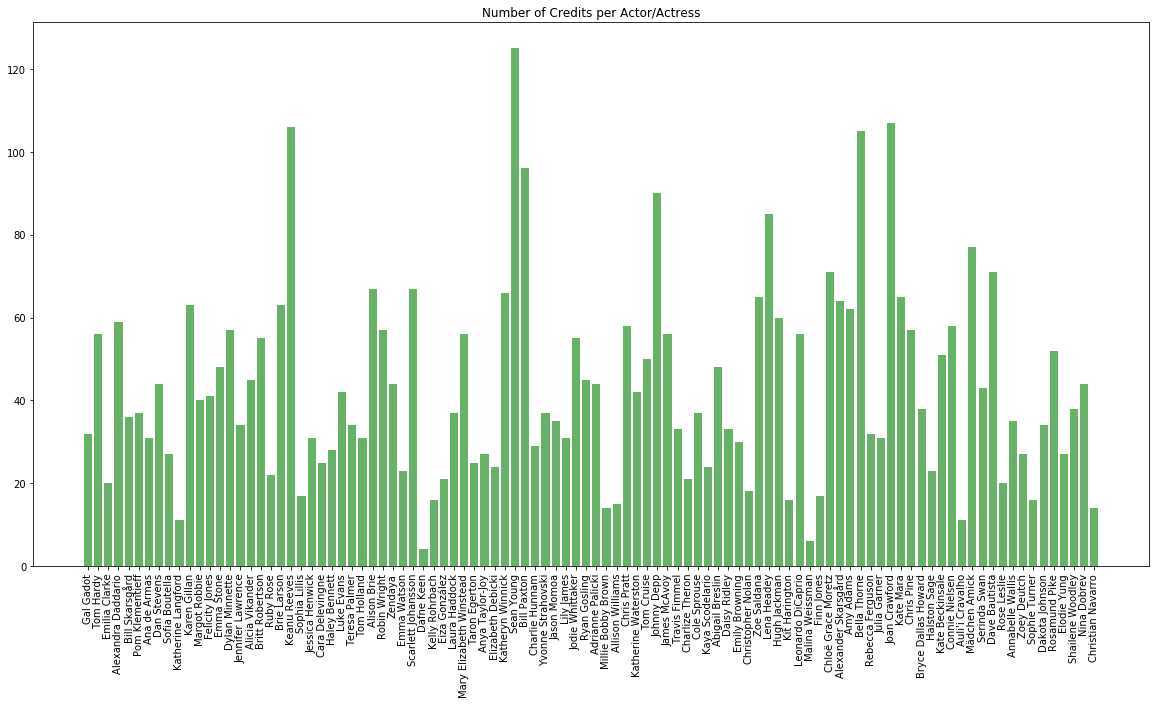

In [261]:
plt.figure(figsize = (20,10))
plt.bar(list(range(len(starinfo.star_name))), starinfo.credits, color = 'green', alpha = 0.6)
plt.title("Number of Credits per Actor/Actress")
plt.xticks(list(range(len(starinfo.star_name))), starinfo.star_name,rotation=90)
plt.show()

<HR>

Your answer here

<HR>

In [ ]:
from IPython.core.display import HTML
def css_styling(): styles = open("styles/cs109.css", "r").read(); return HTML(styles)
css_styling()